<a href="https://colab.research.google.com/github/sazio/Transients/blob/master/Python/DynamicTimeWarping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dtaidistance
!pip install traja

     |████████████████████████████████| 757kB 5.7MB/s 
  Created wheel for dtaidistance: filename=dtaidistance-2.1.2-cp36-cp36m-linux_x86_64.whl size=1446273 sha256=7982a86e2fff9c473e2b19522f86d99828ab3a06cde4733b5680e19e0a5ba4ad
  Stored in directory: /root/.cache/pip/wheels/d6/2c/9e/ed7ddb5538a7f3eab7b743e657f539260c46252c330ee0180e
Successfully built dtaidistance
     |████████████████████████████████| 81kB 2.7MB/s 
  Created wheel for traja: filename=traja-0.2.3-cp36-none-any.whl size=82655 sha256=72cda7925e32c7f1d9e32eb03f8404d7abfcdf16798a90997c5f592af0014873
  Stored in directory: /root/.cache/pip/wheels/03/90/1a/84e9bb38d095fd62bff931244bb861c2eeec6f3b79dd03d945
Successfully built traja


In [14]:
from dtaidistance import dtw, dtw_ndim
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
import pandas as pd 
import traja

In [15]:
# Fast C version
s1 = np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double)
s2 = np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0], dtype=np.double)
d = dtw.distance_fast(s1, s2, use_pruning=True)
print(d)

1.4142135623730951


In [16]:
s1 = np.array([[0, 0],
               [0, 1],
               [2, 1],
               [0, .5],
               [0, 0]], dtype=np.double)
s2 = np.array([[0, 0],
               [2, 1],
               [8, 1],
               [10, 0]], dtype=np.double)
d = dtw_ndim.distance(s1, s2, use_pruning=True)

print(d)

12.854960132182441


In [17]:
from dtaidistance import dtw_ndim

def nDTW(s1,s2):
  """
  Normalized Dynamic Time Warping as in "G.Ilharco et al. 2019"
    s1 = sequence 1 
    s2 = sequence 2 
    d_th = success distance threshold
  
  """
  norm_ = s1.shape[0] #mmmh
  DTW = dtw_ndim.distance(s1, s2, use_pruning= True, use_c=True)
  d_th = 0.01#(norm_ + s2.shape[0])/2

  return np.exp(-(DTW)/(norm_*d_th))

In [18]:
nDTW(s1,s2)

2.2041187555868205e-112

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
path_to_files = "drive/MyDrive/JamesSimoneSpatial/TrackFilesCue/CueCsv/Track/"

In [131]:
seq1 = pd.read_csv(path_to_files + "C02A2_Track.csv", header = None)
seq1 = seq1.loc[:,1:2]
#seq1.head()
seq1 = seq1.values.astype(np.double)

In [132]:
seq2 = pd.read_csv(path_to_files + "C02A3_Track.csv", header = None)
seq2 = seq2.loc[:,1:2]
#seq2.head()
seq2 = seq2.values.astype(np.double)

In [133]:
seq3 = pd.read_csv(path_to_files + "C14C3_Track.csv", header = None)
seq3 = seq3.loc[:,1:2]
#seq2.head()
seq3 = seq3.values.astype(np.double)

In [134]:
nDTW(seq1, seq2)

0.41259763822899354

In [135]:
dtw_ndim.distance(seq1, seq2, use_c = True, use_pruning= True)

54.94062589785752

In [136]:
dtw_ndim.distance(seq2, seq3, use_c = True, use_pruning= True)

54.077343002473484

In [138]:
## Using traja
seq1t = traja.TrajaDataFrame(seq1, columns = ["x","y"])
seq2t = traja.TrajaDataFrame(seq2, columns = ["x","y"])
seq3t = traja.TrajaDataFrame(seq3, columns = ["x","y"])

seq1t["time"] = [i*0.001 for i in seq1t.index]
seq2t["time"] = [i*0.001 for i in seq2t.index]
seq3t["time"] = [i*0.001 for i in seq3t.index]

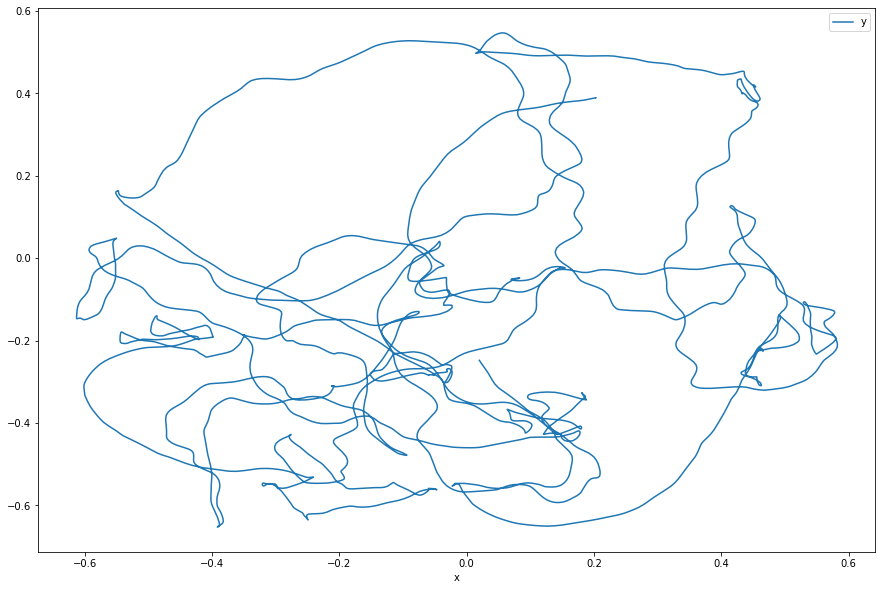

In [171]:
traja.smooth_sg(seq2t).plot(x = "x", y = "y", figsize = (15,10))

In [157]:
seq1t.traja.get_derivatives().dropna()

,displacement,displacement_time,speed,speed_times,acceleration,acceleration_times
2,0.000000,0.002,0.000000,0.002,0.000000,0.002
3,0.000000,0.003,0.000000,0.003,0.000000,0.003
4,0.000000,0.004,0.000000,0.004,0.000000,0.004
5,0.000000,0.005,0.000000,0.005,0.000000,0.005
6,0.000000,0.006,0.000000,0.006,0.000000,0.006
...,...,...,...,...,...,...
6201,0.000928,6.201,0.928009,6.201,0.025675,6.201
6202,0.000925,6.202,0.924886,6.202,-3.123510,6.202
6203,0.000927,6.203,0.926951,6.203,2.064914,6.203
6204,0.000927,6.204,0.926934,6.204,-0.017136,6.204


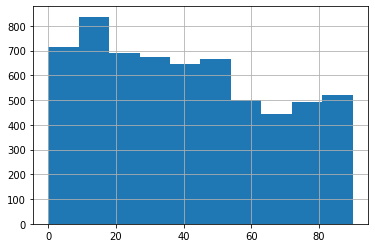

In [160]:
traja.trajectory.calc_angle(seq1t).dropna().hist()

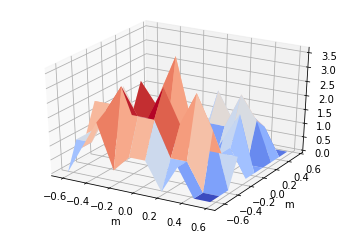

In [174]:
traja.plotting.plot_surface(seq2t)

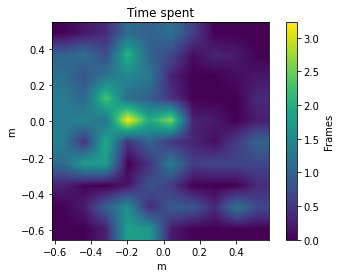

In [180]:
hist, image = traja.trip_grid(seq2t, normalize = True)

In [ ]:
traja.plotting.animate(seq2t, save = True)

/usr/local/lib/python3.6/dist-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


In [ ]:
!ls 

In [18]:
#traja.plot_quiver(seq1t, bins=32)

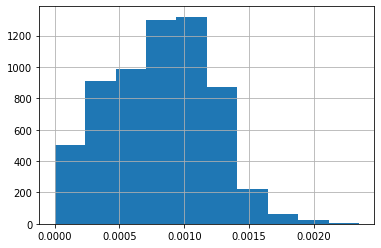

In [150]:
traja.step_lengths(seq1t).hist()

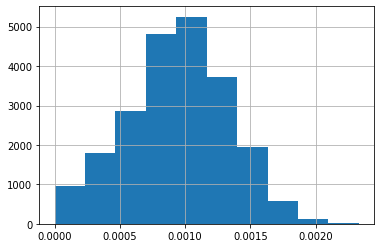

In [151]:
traja.step_lengths(seq2t).hist()

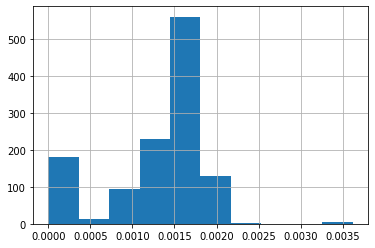

In [31]:
traja.step_lengths(seq3t).hist()

In [97]:
from scipy.stats import levy_stable, norm

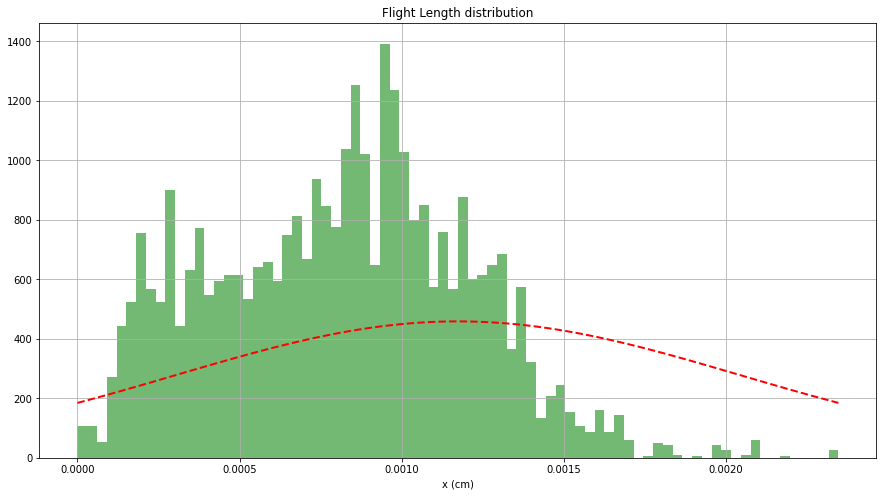

In [153]:
# the histogram of the data

plt.figure(figsize = (15,8))

x = traja.step_lengths(seq1t).dropna()
n, bins, patches = plt.hist(x, int(np.sqrt(x.shape[0])), density = True, facecolor='green', alpha=0.55)

# add a 'best fit' line
#y = norm.pdf( bins, *norm._fitstart(bins))
y = levy_stable.pdf(bins,*levy_stable._fitstart(bins))

l = plt.plot(bins, y, 'r--', linewidth=2)


plt.title("Flight Length distribution")
plt.xlabel('x (cm)')
plt.ylabel('')

plt.grid(True)

plt.show()
